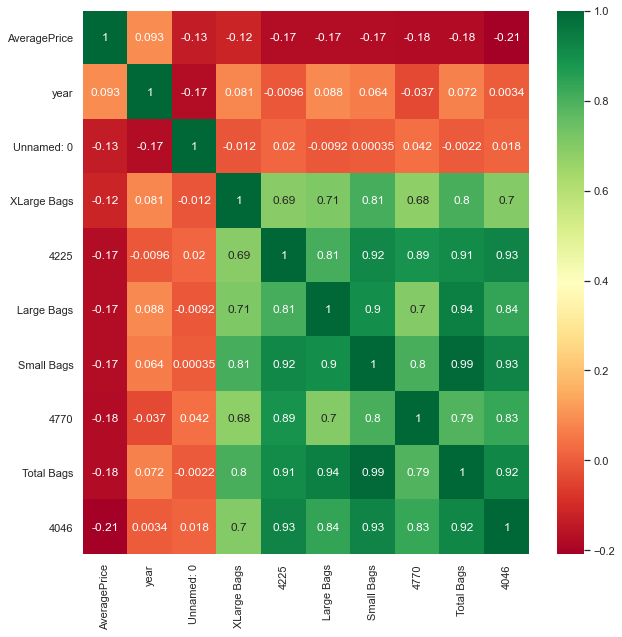

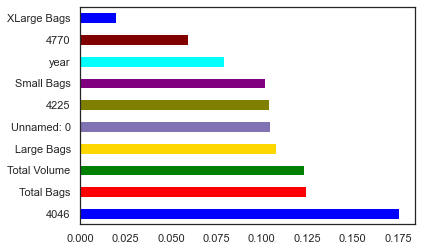

In [110]:
import importlib
import data_transform
importlib.reload(data_transform)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Visualization.Feature_importance import FeatImp
from data_transform import apply_transformations
import seaborn as sns



data = pd.read_csv('data/avocado.csv')
#print(data.dtypes)
data['Date']
data_1 = data.drop(['Date','type','region'],axis = 1)
fi = FeatImp(data_1)
fi.corr_matrix(target_name='AveragePrice',method_version = 1)
fi.tree_selection(target_name='AveragePrice')

sns.set(style='white', context='notebook', palette='deep')

In [19]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


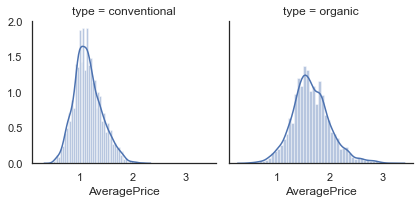

In [18]:
g = sns.FacetGrid(data, col='type')
g = g.map(sns.distplot, "AveragePrice")
'''There is a distinct difference of prices in types of avocados. We can see that organic avocados on average cost 0.5 more than
conventional --> OneHotEncoding'''

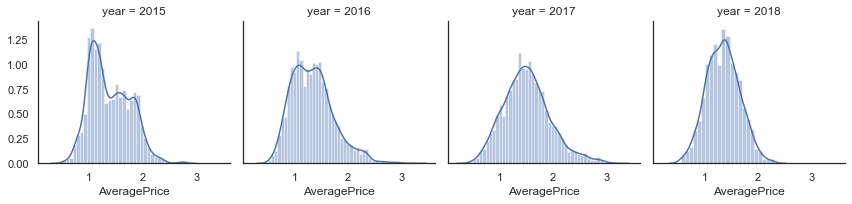

In [20]:
g = sns.FacetGrid(data, col='year')
g = g.map(sns.distplot, "AveragePrice")

<Figure size 1440x1440 with 0 Axes>

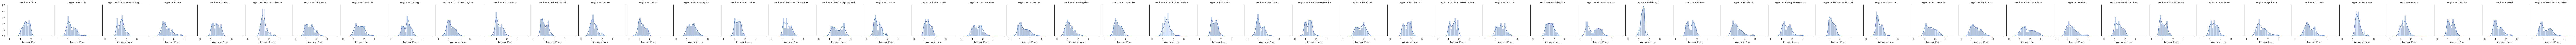

In [23]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(data, col='region')
g = g.map(sns.distplot, "AveragePrice")

In [ ]:
'''type,year,region-> One Hot Encoding, I will get a lot of additional features
   date --> I will rearange the rows so that it will be aranged in an ascending order according to dates. This way the data will
   be similar to time-series.
   Total Volume, Total Bags , 4046,4770,4225 -> I will transform these features with a log-transformation.'''

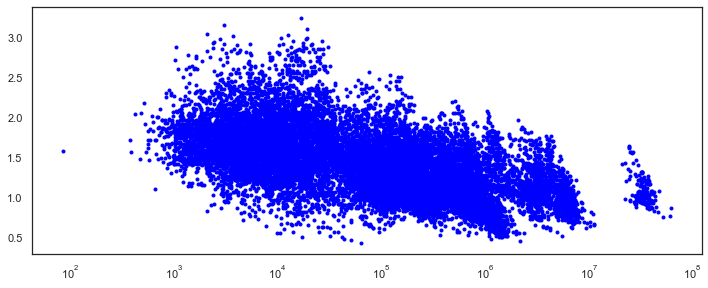

In [25]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(data['Total Volume'],data['AveragePrice'], color='blue', lw=0,marker='.')
ax.set_xscale('log')

plt.show()

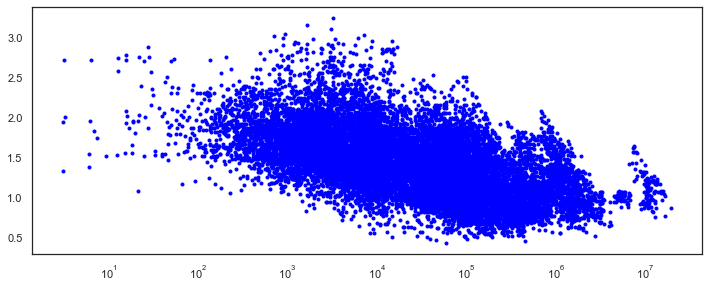

In [26]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(data['Total Bags'],data['AveragePrice'], color='blue', lw=0,marker='.')
ax.set_xscale('log')

plt.show()

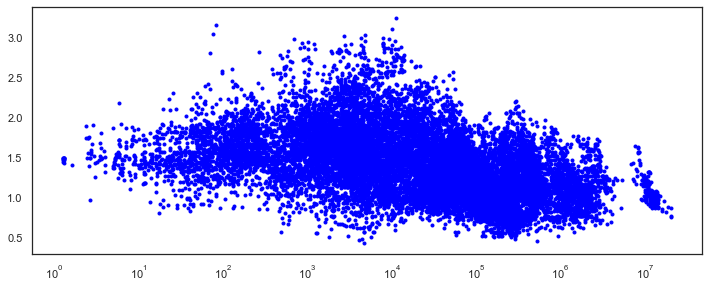

In [27]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(data['4225'],data['AveragePrice'], color='blue', lw=0,marker='.')
ax.set_xscale('log')

plt.show()

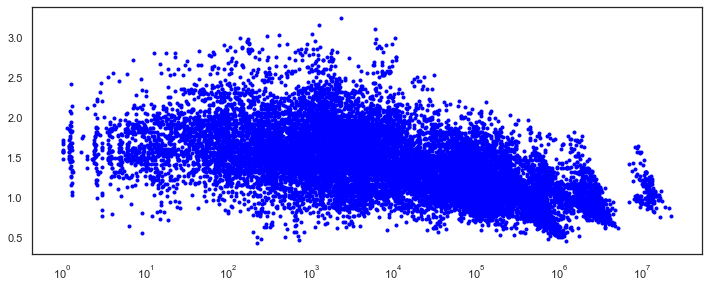

In [28]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(data['4046'],data['AveragePrice'], color='blue', lw=0,marker='.')
ax.set_xscale('log')

plt.show()

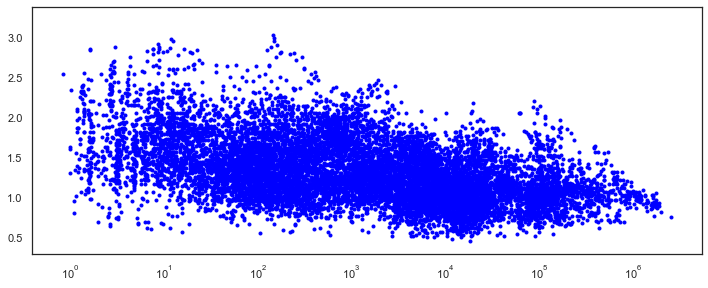

In [29]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(data['4770'],data['AveragePrice'], color='blue', lw=0,marker='.')
ax.set_xscale('log')

plt.show()

In [ ]:
'''There is some linearity shown when I apply log-transform to these features, which may help with getting the right prices of avocados'''


In [113]:

data = pd.read_csv('data/avocado.csv')

target = data['AveragePrice']

data = data.drop(['Unnamed: 0','AveragePrice'],axis = 1)


data_2 = apply_transformations(data)
data_2

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,conventional,organic,...,03,04,05,06,07,08,09,10,11,12
0,4.807789,3.016089,4.736045,1.691612,3.939413,3.934732,1.974281,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.739398,2.829484,4.649722,1.773274,3.978023,3.973547,1.993392,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5.072695,2.900749,5.038026,2.118926,3.910963,3.905429,2.017618,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.897589,3.054230,4.857196,1.866760,3.764338,3.754226,2.129561,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.707916,2.974272,4.641865,1.885248,3.791336,3.777228,2.298176,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4.232382,3.311321,3.184748,0.000000,4.130323,4.116203,2.636337,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18245,4.142672,3.076531,3.535611,0.000000,3.966885,3.951388,2.512951,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18246,4.138863,3.076611,3.389837,2.862692,3.972902,3.970942,1.636588,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18247,4.209682,3.184302,3.474513,2.862137,4.040228,4.038244,1.707570,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
